# Louisville Restaurant Health Inspections ---Xinlin Shuai

In [1]:
# import all the Python modules and libraries
import urllib.request as req
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
dataset = req.urlopen('http://stream.cs.ucdavis.edu/datasets/Restaurant_Inspection.csv')
data = pd.read_csv(dataset)

# check the data
data.shape

(9436, 17)

In [3]:
data.head(5)

EstablishmentID  InspectionID   EstablishmentName  PlaceName  \
0           100798       1419478        SUPER USA #9        NaN   
1            52375       1419480     PAPA JOHN'S #12        NaN   
2            70722       1419481        PENN STATION        NaN   
3            96303       1419485  CORNER PIZZA & PUB        NaN   
4           104463       1419508   LOGAN'S TREEHOUSE        NaN   

                    Address  Address2        City State    Zip  \
0        2704 CRITTENDEN DR       NaN  LOUISVILLE    KY  40209   
1         6902 SOUTHSIDE DR       NaN  LOUISVILLE    KY  40214   
2        300 W WOODLAWN AVE       NaN  LOUISVILLE    KY  40214   
3            4111 MURPHY LN       NaN  LOUISVILLE    KY  40241   
4  7113 LOWER HUNTERS TRACE       NaN  LOUISVILLE    KY  40258   

                              TypeDescription  Latitude  Longitude  \
0           RETAIL-FOOD  10,000 SQ FT OR LESS   38.2047   -85.7511   
1                                FOOD SERVICE   38.1577   -85.7650   
2                                FOOD SERVICE   38.1814   -85.7665   
3                                FOOD SERVICE   38.3031   -85.5327   
4  FOOD SERVICE (DAY CARE / CHILD CARE CENTER   38.1746   -85.8800   

        InspectionDate  Score Grade          NameSearch  Intersection  
0  2018-10-08 00:00:00  100.0     A        SUPER USA #9           NaN  
1  2018-10-08 00:00:00   98.0     A     PAPA JOHN'S #12           NaN  
2  2018-10-08 00:00:00   97.0     A        PENN STATION           NaN  
3  2018-10-08 00:00:00   92.0     A  CORNER PIZZA & PUB           NaN  
4  2018-10-08 00:00:00   97.0     A   LOGAN'S TREEHOUSE           NaN

# Visualization（Using Seaborn）
#### x-axis represents longitude, y-axis represents latitube, coordinate represents the location of the restaurant 
#### Point color represent the TYPE of the restaurant
#### Point shape represent the GRADE

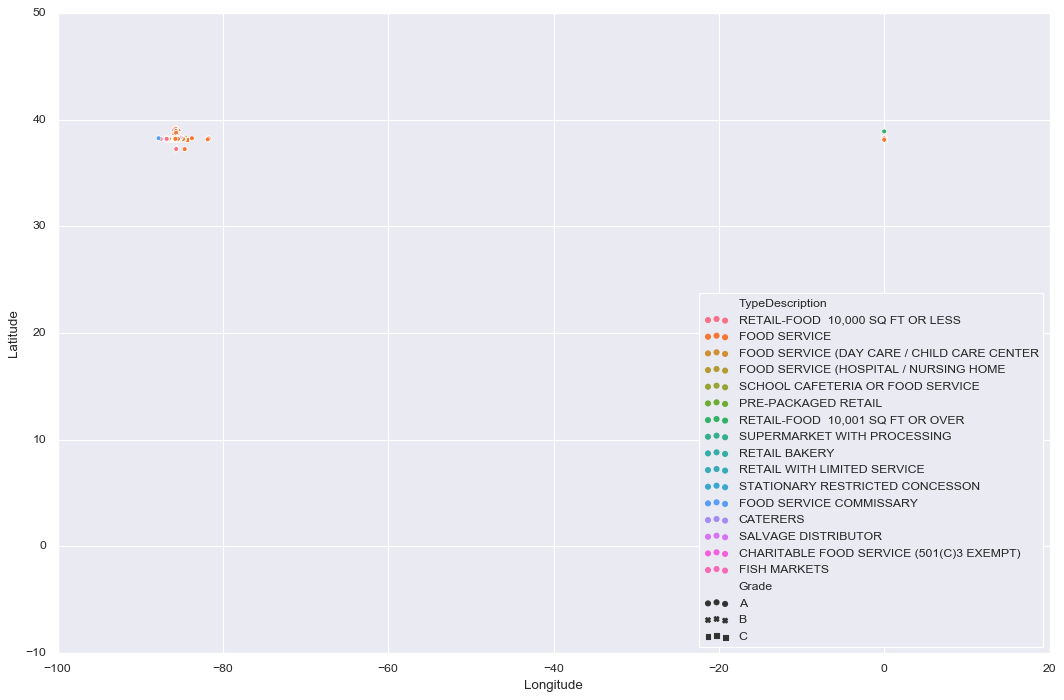

In [4]:
plt.style.use('classic')
sns.set()
plt.figure(figsize=(16,10))
sns.scatterplot(data.Longitude, data.Latitude, hue=data.TypeDescription, style=data.Grade)
plt.legend(loc='lower right')
plt.ioff()

We noticed that some restaurants have longitudes near 0, which is not true. Remove inaccurate restaurants from the data and re-visualize.

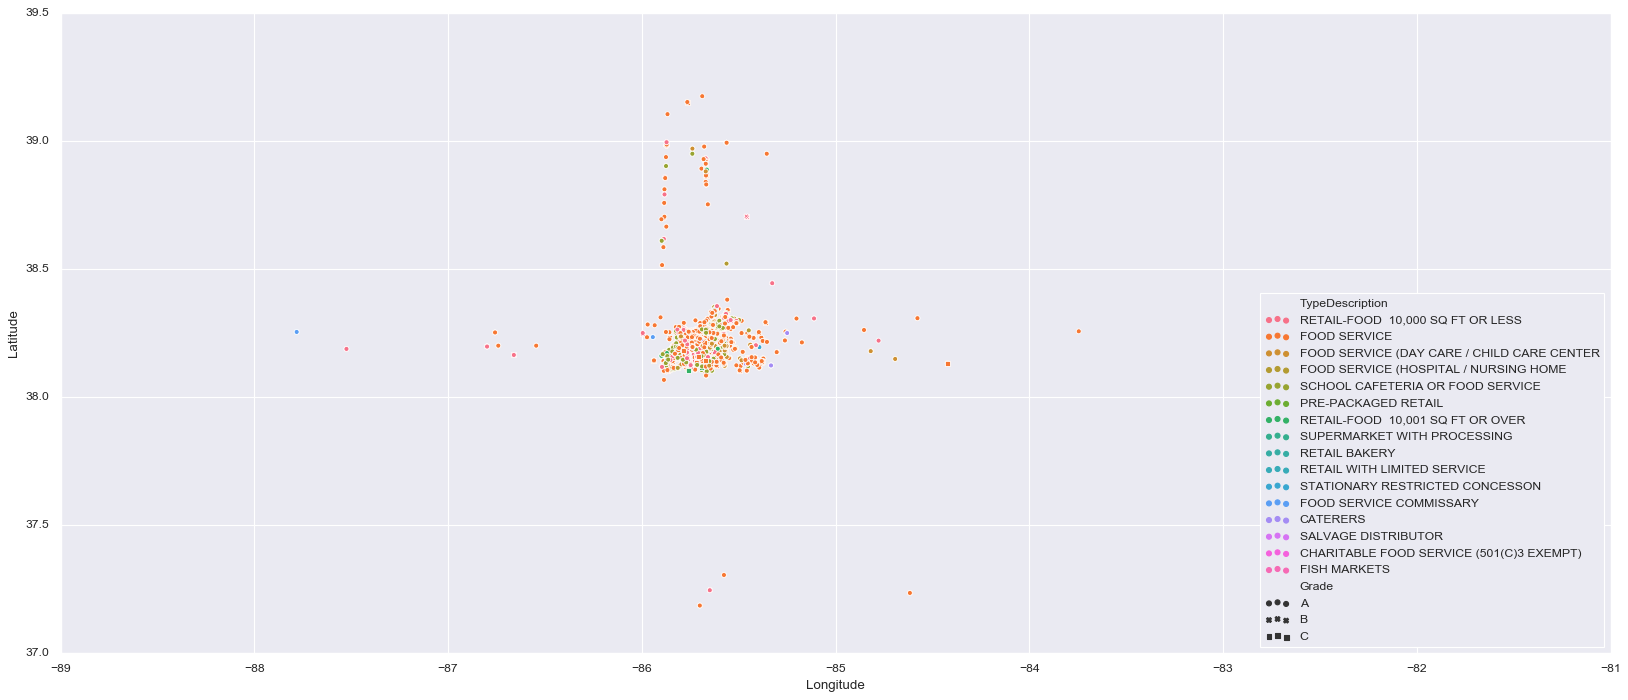

In [5]:
data2=data.loc[data['Longitude']!=0 ]
plt.figure(figsize=(25,10))
sns.scatterplot(data2.Longitude, data2.Latitude, hue=data2.TypeDescription, style=data2.Grade)
plt.legend(loc='lower right')
plt.ioff()

We noticed that most restaurants are concentrated in a certain area and re-visualize this area.

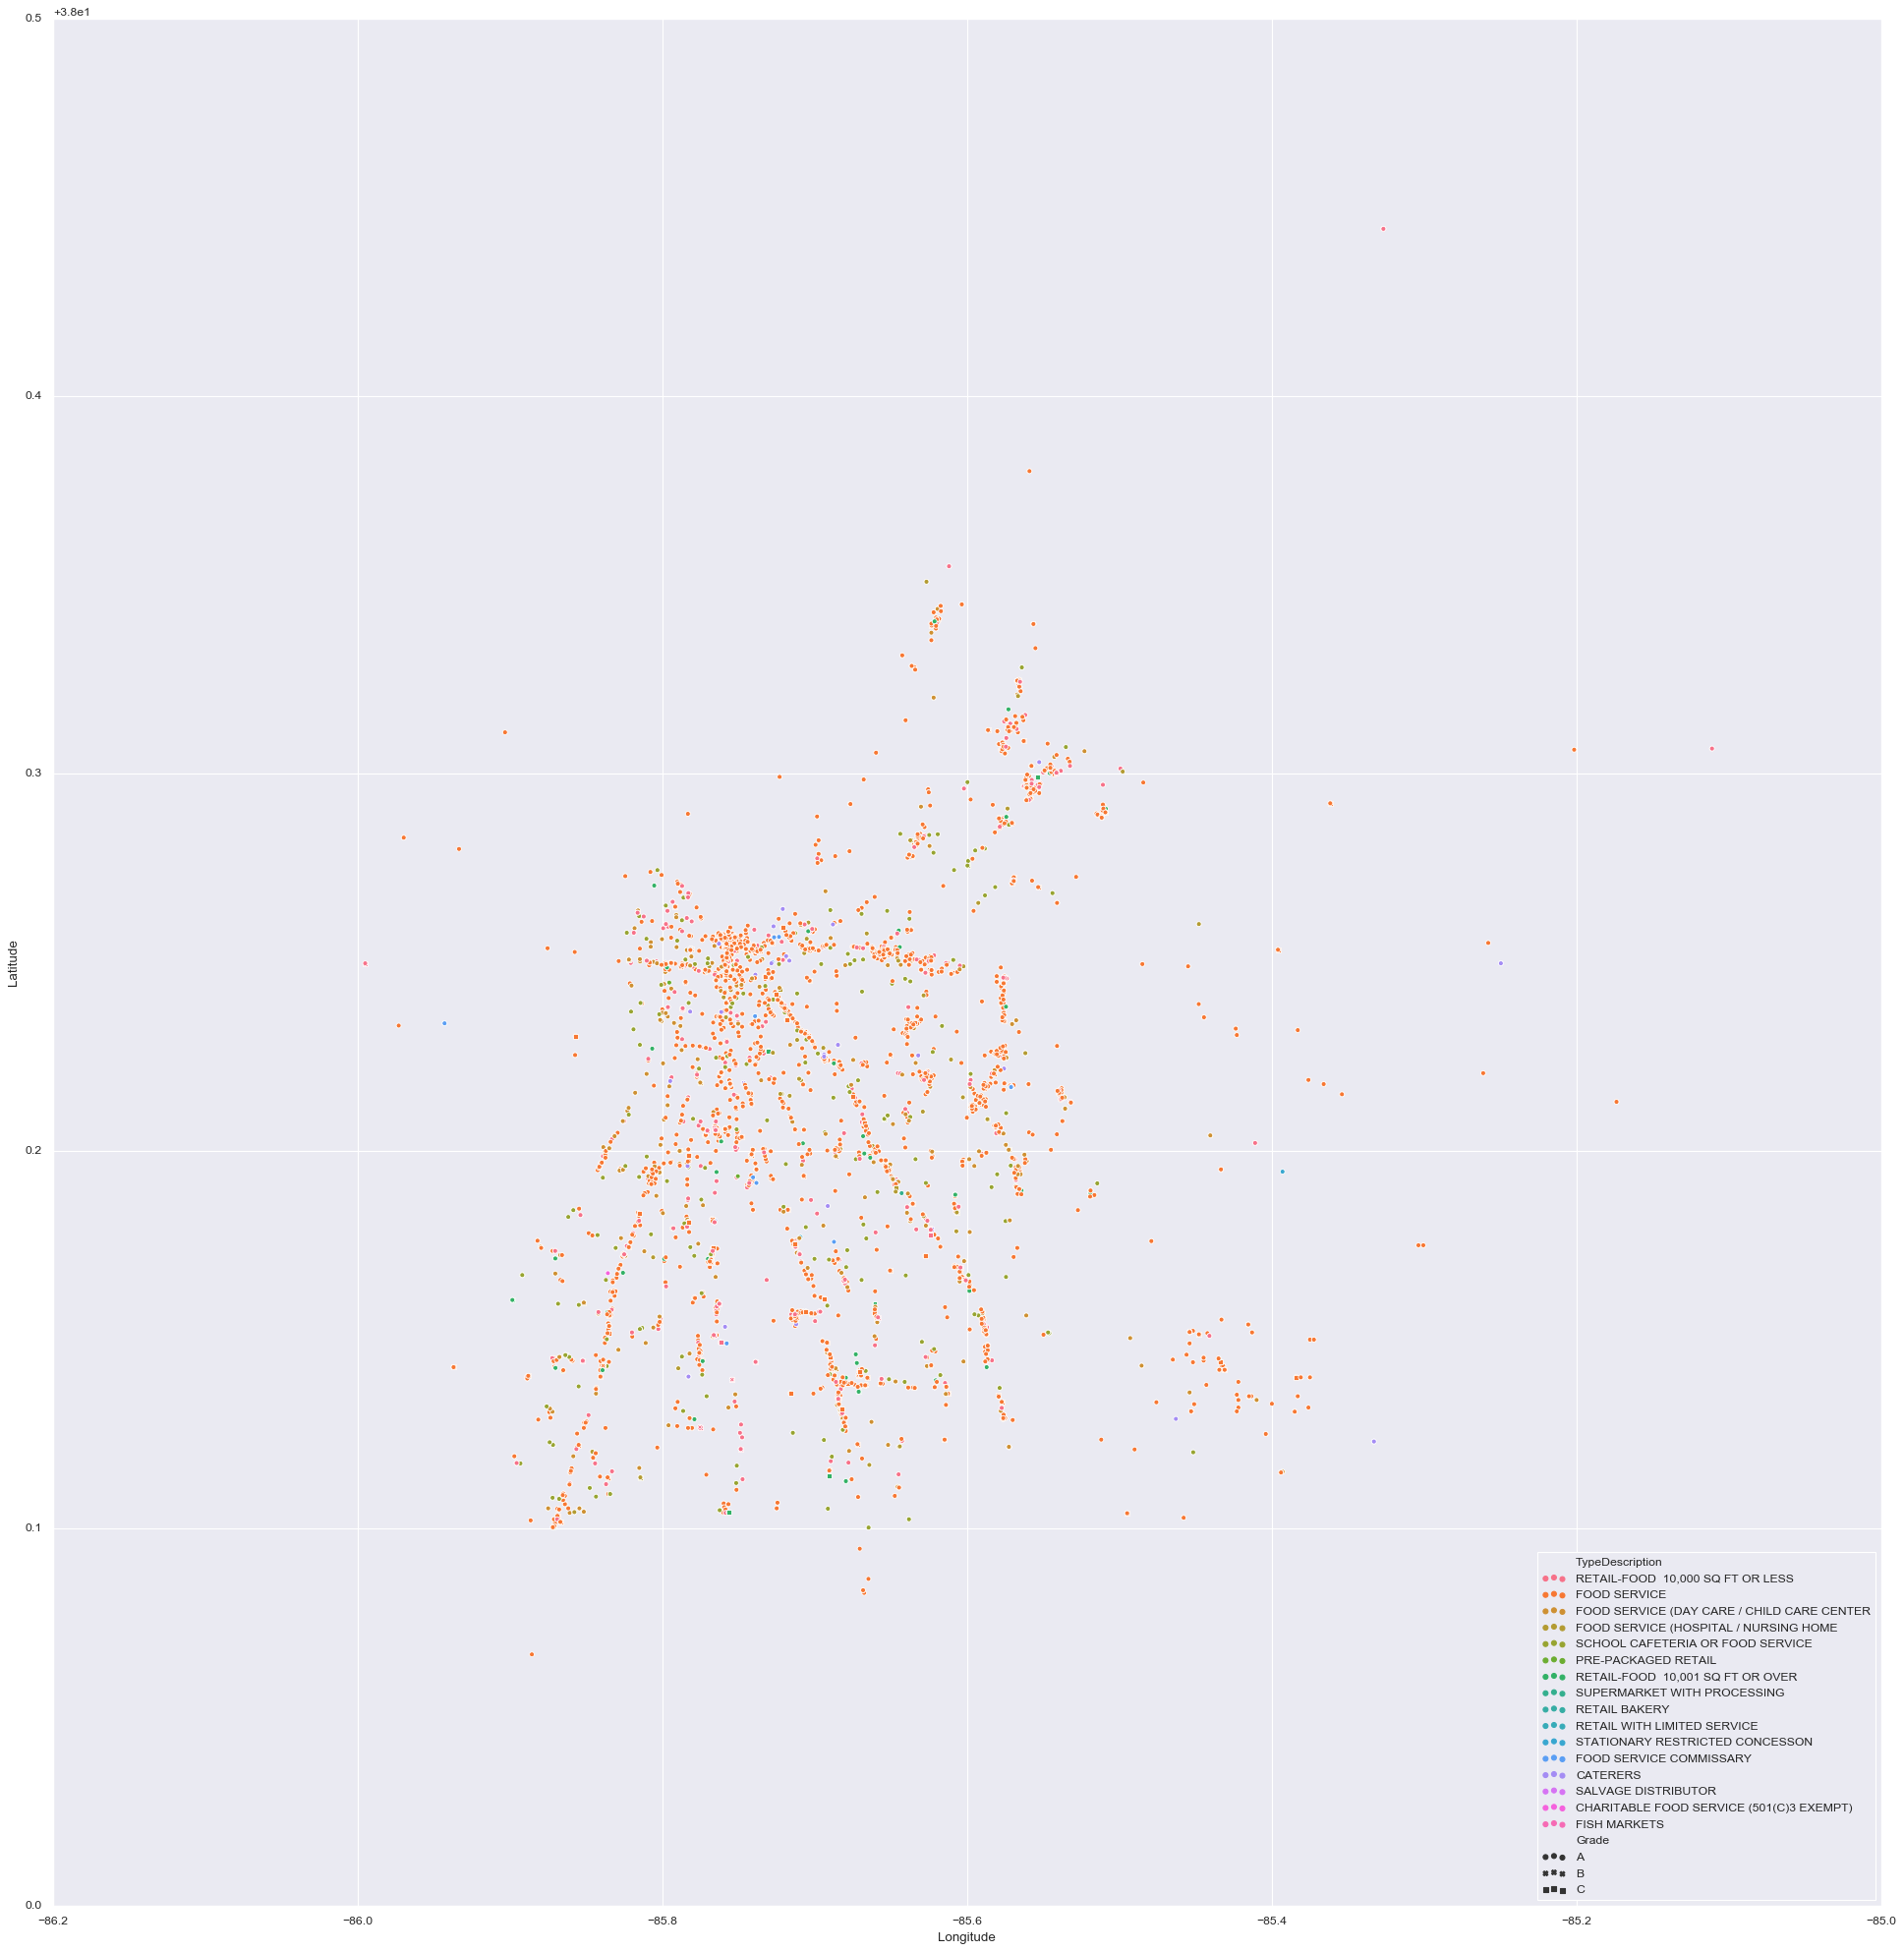

In [6]:
data4=data.loc[-86<data['Longitude']]
data6=data4.loc[data4['Longitude']<-85]
data5=data6.loc[data6['Latitude']<38.5]
data3=data5.loc[data5['Latitude']>38]
plt.figure(figsize=(30,30))
sns.scatterplot(data3.Longitude, data3.Latitude, hue=data3.TypeDescription, style=data3.Grade)
plt.legend(loc='lower right')
plt.ioff()

## Add the restaurant type and analyze whether the score is related to the restaurant type.

In [7]:
keys=['TypeDescription']
groups=data2.groupby(keys,as_index=keys,sort=False)
groups['Score'].mean().to_frame().reset_index()

TypeDescription       Score
0            RETAIL-FOOD  10,000 SQ FT OR LESS   97.272727
1                                 FOOD SERVICE   97.139635
2   FOOD SERVICE (DAY CARE / CHILD CARE CENTER   98.527426
3        FOOD SERVICE (HOSPITAL / NURSING HOME   97.389831
4             SCHOOL CAFETERIA OR FOOD SERVICE   99.356742
5                          PRE-PACKAGED RETAIL   97.433333
6            RETAIL-FOOD  10,001 SQ FT OR OVER   96.692308
7                  SUPERMARKET WITH PROCESSING   95.800000
8                                RETAIL BAKERY   98.500000
9                  RETAIL WITH LIMITED SERVICE   98.567568
10             STATIONARY RESTRICTED CONCESSON   98.593750
11                     FOOD SERVICE COMMISSARY   98.531915
12                                    CATERERS   98.280488
13                         SALVAGE DISTRIBUTOR   96.000000
14    CHARITABLE FOOD SERVICE (501(C)3 EXEMPT)  100.000000
15                                FISH MARKETS  100.000000

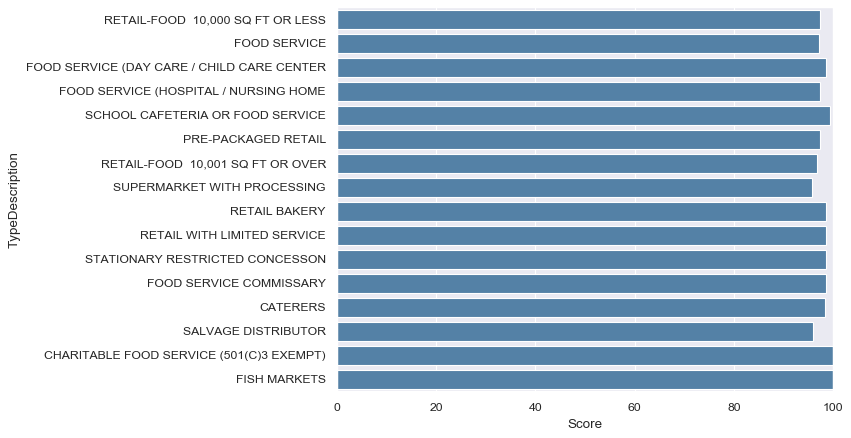

In [8]:
result=groups['Score'].mean().to_frame().reset_index()
sns.barplot(y='TypeDescription',x='Score',data=result,color='steelblue')

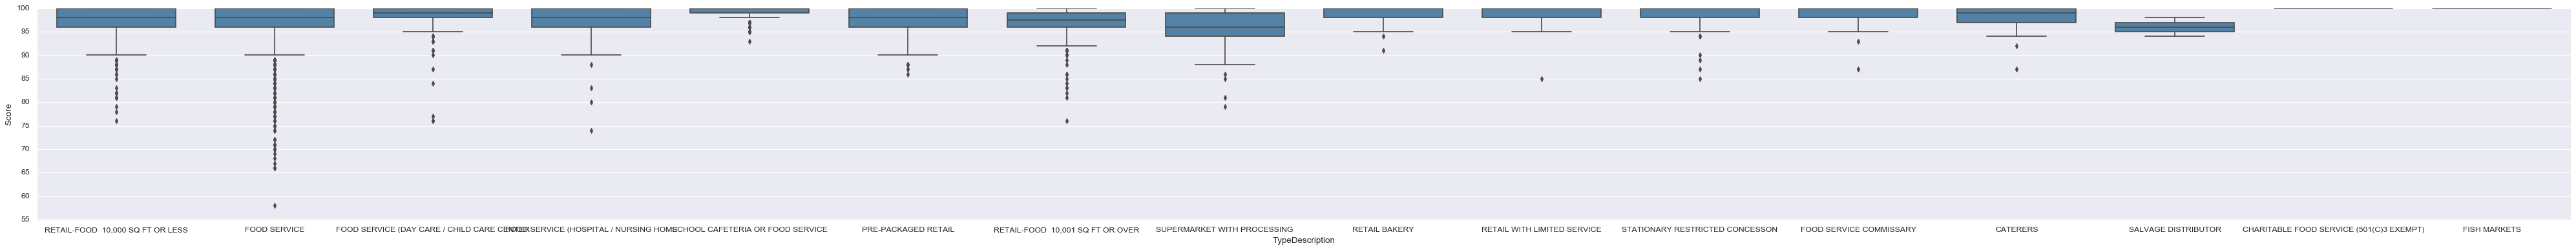

In [9]:
sns.catplot(data=data2, x='TypeDescription', y='Score', color='steelblue', kind='box', aspect=10, width=0.75)

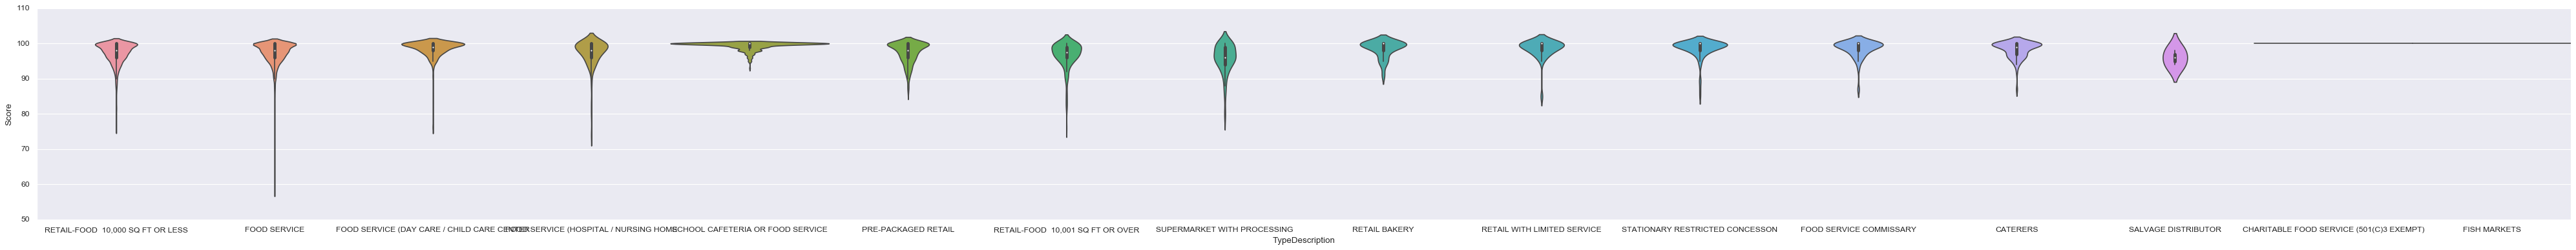

In [10]:
sns.catplot(data=data2, x='TypeDescription', y='Score', kind='violin', aspect=10, width=1)

### NUMBER OF the restaurants of one TYPE

In [11]:
a=[]
a.append(len( data[data['TypeDescription'] == "RETAIL-FOOD  10,000 SQ FT OR LESS"] ))
a.append(len( data[data['TypeDescription'] == "FOOD SERVICE"] ))
a.append(len( data[data['TypeDescription'] == "FOOD SERVICE (DAY CARE / CHILD CARE CENTER"] ))
a.append(len( data[data['TypeDescription'] == "FOOD SERVICE (HOSPITAL / NURSING HOME"] ))
a.append(len( data[data['TypeDescription'] == "SCHOOL CAFETERIA OR FOOD SERVICE"] ))
a.append(len( data[data['TypeDescription'] == "PRE-PACKAGED RETAIL"] ))
a.append(len( data[data['TypeDescription'] == "RETAIL-FOOD  10,001 SQ FT OR OVER"] ))
a.append(len( data[data['TypeDescription'] == "SUPERMARKET WITH PROCESSING"] ))
a.append(len( data[data['TypeDescription'] == "RETAIL BAKERY"] ))
a.append(len( data[data['TypeDescription'] == "RETAIL WITH LIMITED SERVICE"] ))
a.append(len( data[data['TypeDescription'] == "STATIONARY RESTRICTED CONCESSON"] ))
a.append(len( data[data['TypeDescription'] == "FOOD SERVICE COMMISSARY"] ))
a.append(len( data[data['TypeDescription'] == "CATERERS"] ))
a.append(len( data[data['TypeDescription'] == "SALVAGE DISTRIBUTOR"] ))
a.append(len( data[data['TypeDescription'] == "CHARITABLE FOOD SERVICE (501(C)3 EXEMPT)"] ))
a.append(len( data[data['TypeDescription'] == "FISH MARKETS"] ))
a

[1477, 5650, 503, 143, 405, 459, 347, 115, 31, 38, 113, 59, 91, 2, 2, 1]

# Insight

1. As we can see from the first coordinate chart, most restaurants belong to the food service which covers above 60%. And most restaurants have reached the Grade of A.

2. Add the restaurant type and analyze whether the score is related to the restaurant type. As can be seen from the last two graphs, there is a possible relationship between restaurant type and score. The smaller the number of restaurants of that type, the higher the score. This may be because these restaurants are relatively small, so the requirements are higher.